# King County Housing analysis

## Getting started and Preparing Data

### Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import datetime as dt
import numpy as np
#import descartes as dc
#import geopandas as gpd
#from shapely.geometry import Point, polygon


%matplotlib inline
plt.style.use('seaborn')
np.random.seed(42)

### Load Data

In [5]:
kc = pd.read_csv('King_County_House_prices_dataset.csv')

In [13]:
kc.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  735519  221900.0         3       1.00         1180      5650   
1  6414100192  735576  538000.0         3       2.25         2570      7242   
2  5631500400  735654  180000.0         2       1.00          770     10000   
3  2487200875  735576  604000.0         4       3.00         1960      5000   
4  1954400510  735647  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0         NaN   0.0  ...      7        1180            0.0      1955   
1     2.0         0.0   0.0  ...      7        2170          400.0      1951   
2     1.0         0.0   0.0  ...      6         770            0.0      1933   
3     1.0         0.0   0.0  ...      7        1050          910.0      1965   
4     1.0         0.0   0.0  ...      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [16]:
missing = pd.DataFrame(kc.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/kc.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

In [14]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  int64  
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [18]:
kc.nunique()

id               21420
date                 1
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### replace missing value indicator '?' with 'NaN'

In [12]:
kc.replace(to_replace=['?', ''], value='NaN', inplace=True)

In [15]:
kc.sqft_basement = kc.sqft_basement.astype(float)

### change date to ordinal

In [17]:
kc['date'] = pd.to_datetime(kc['date'])
kc['date']=kc['date'].map(dt.datetime.toordinal)

### add dummy variables

In [82]:
continuous_var = list(kc.select_dtypes(
                        ['int64','float64','bool']).columns.values)
continuous_var.remove('id')
continuous_var.remove('waterfront')
categorical_var=['waterfront']
continuous_var

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

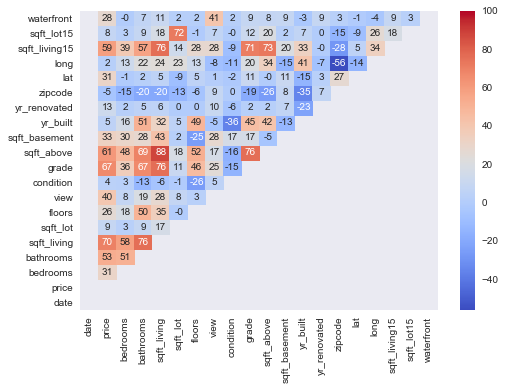

In [26]:
kc_dum=pd.get_dummies(kc[continuous_var+categorical_var].copy())
mask = np.triu(kc_dum.corr())
ax = sns.heatmap(round(kc_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,20))
plt.savefig('figures/correlogram.png')

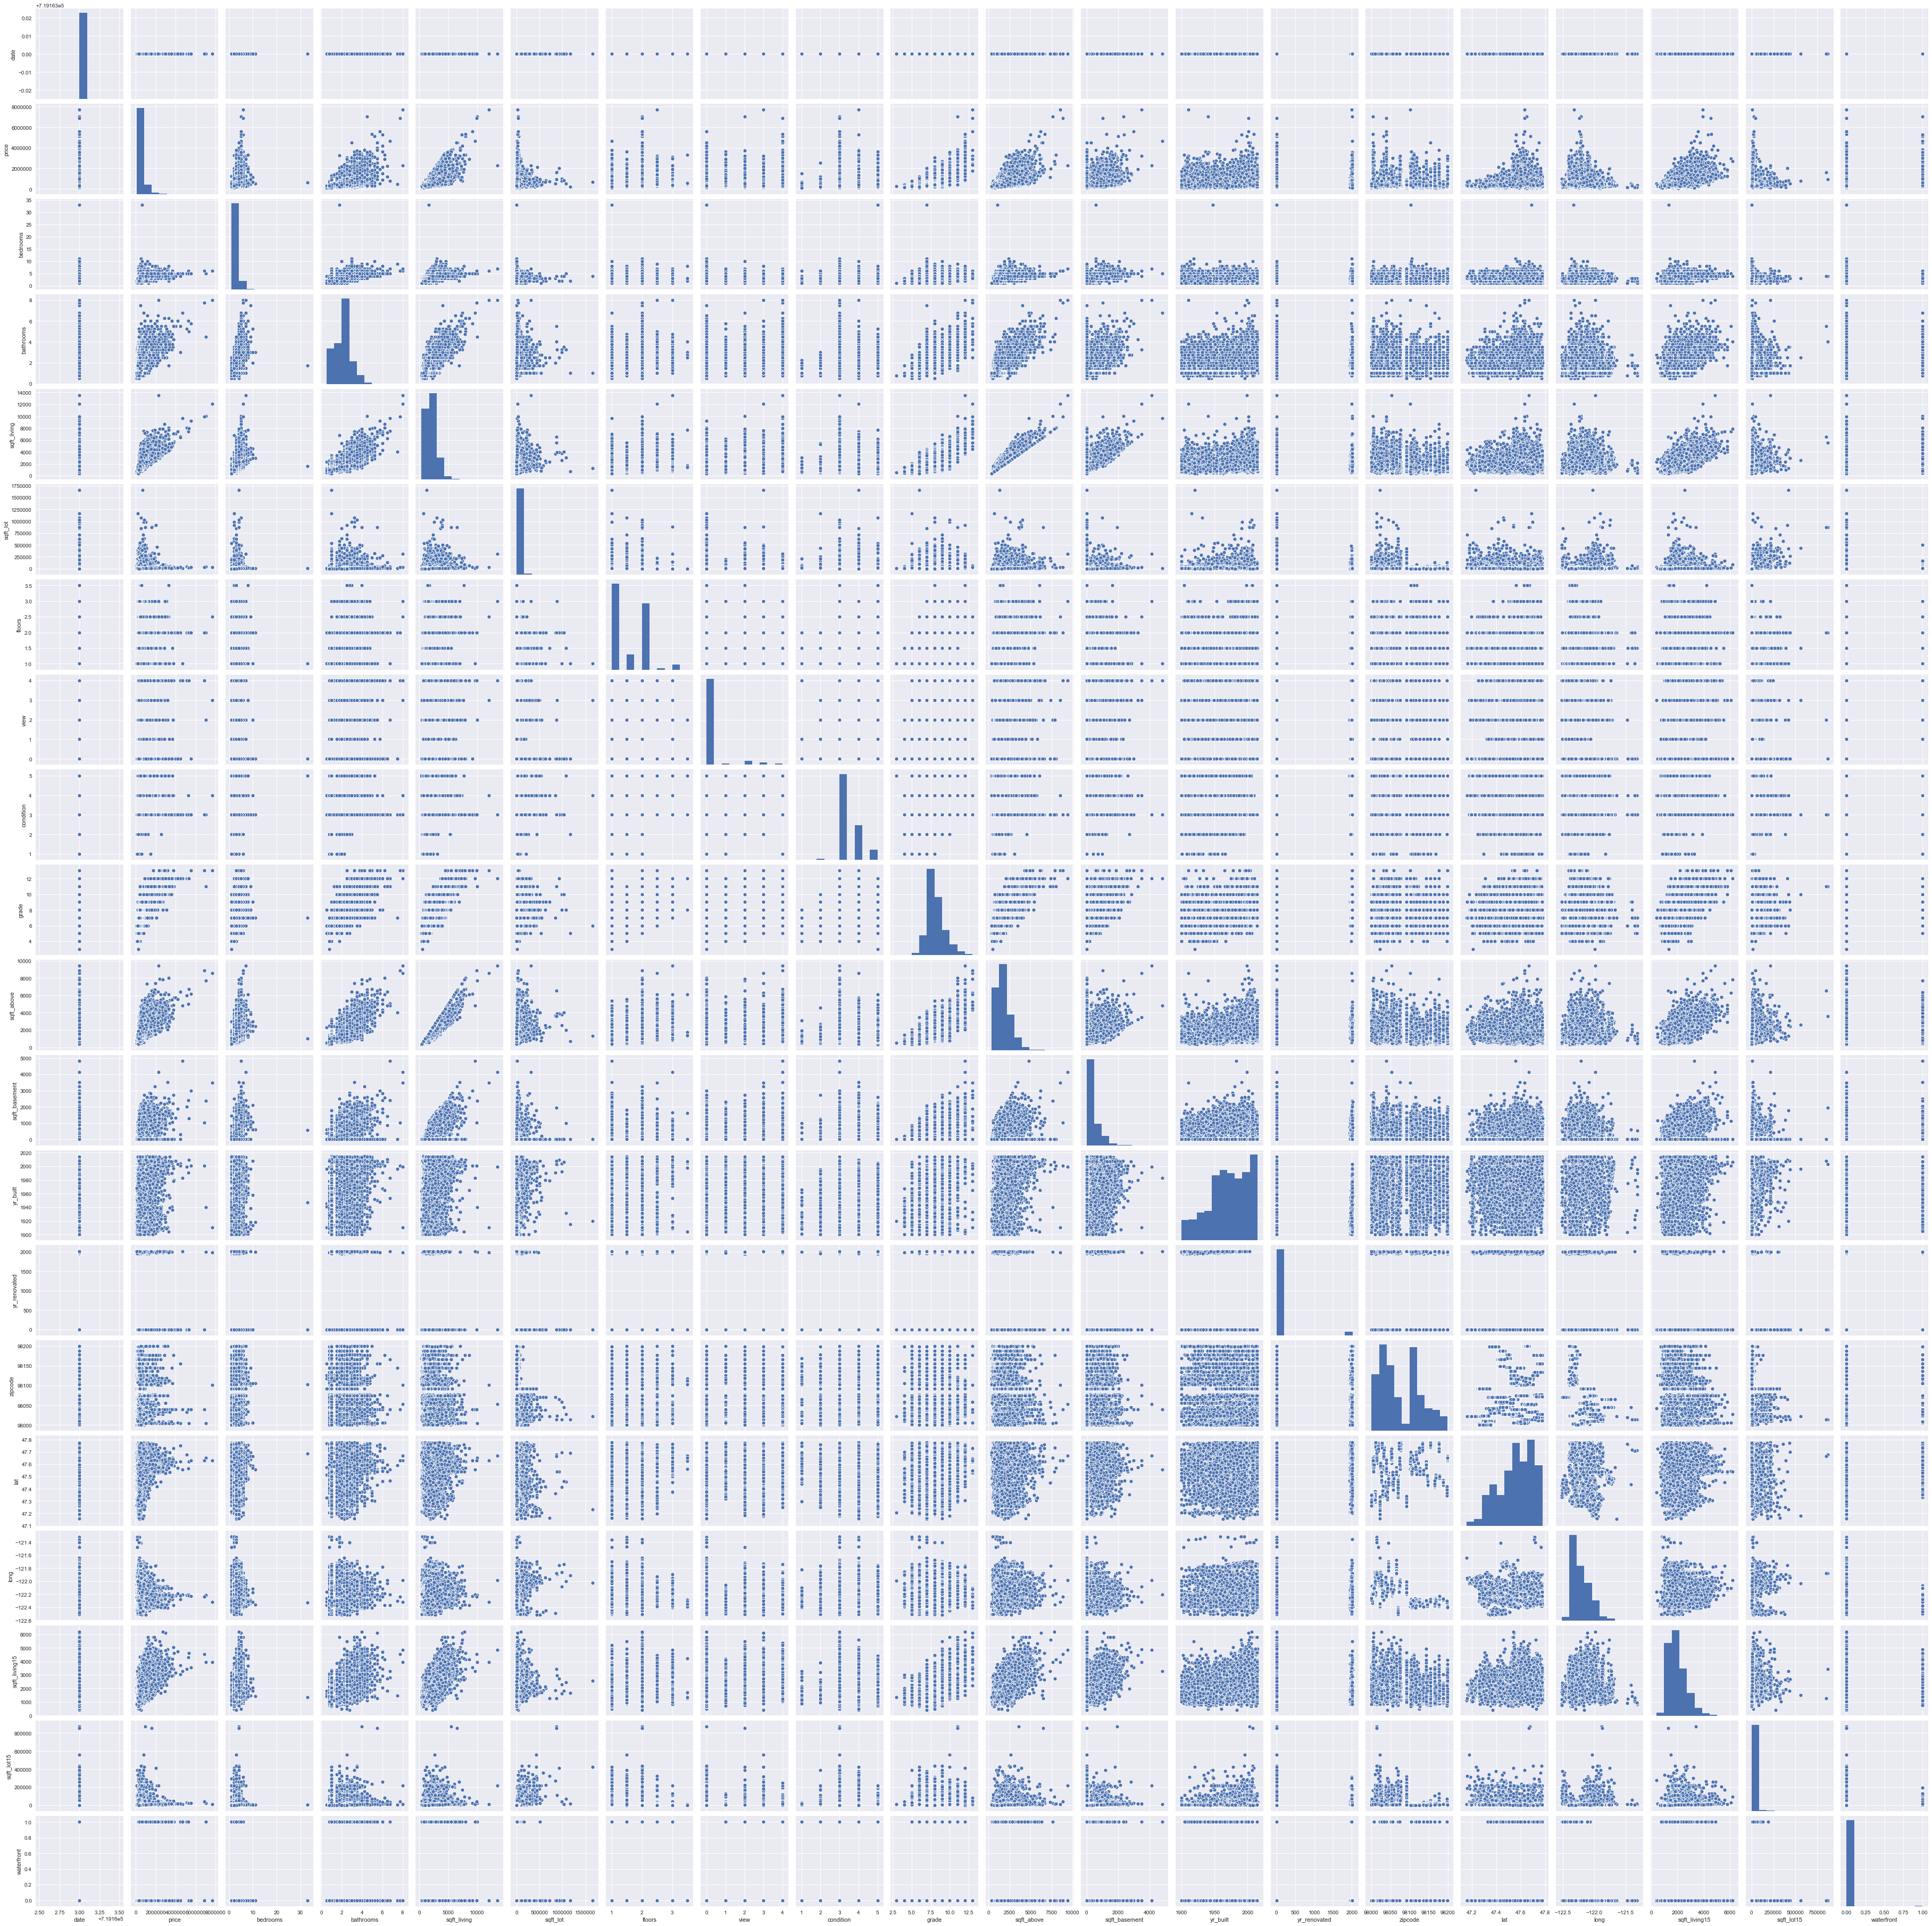

In [27]:
_ =sns.pairplot(kc_dum)
plt.savefig('figures/pairplot.png')

In [59]:
grade_cov = continuous_var
grade_cav = categorical_var

In [63]:
grade_cov.remove('grade')

In [65]:
grade_cov.remove('zipcode')

In [67]:
grade_cov.remove('condition')

In [69]:
grade_cov.remove('sqft_basement')

In [70]:
grade_cov.remove('sqft_lot15')

In [72]:
grade_cov.remove('sqft_lot')

In [73]:
y = 'grade'
cov = grade_cov
cav = grade_cav

dsf = ' + '.join(list(cov)) + ' + ' + ' + '.join(list(cav))
ols_formula = f'{y} ~ + {dsf}'
smf.ols(formula=ols_formula, data = kc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3325.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:26:27   Log-Likelihood:                -14464.
No. Observations:               15762   AIC:                         2.896e+04
Df Residuals:                   15748   BIC:                         2.906e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.13e-10   1.05e-11    -20.329      0.000   -2.34e-10   -1.92e-10
date             -0.0002   7.54e-06    -20.329      0.000      -0.000      -0.000
price          8.333e-07   2.25e-08     37.036      0.000    7.89e-07    8.77e-07
bedrooms         -0.0749      0.007    -11.365      0.000      -0.088      -0.062
bathrooms         0.0711      0.012      6.178      0.000       0.049       0.094
sqft_living       0.0002   1.56e-05     13.949      0.000       0.000       0.000
floors            0.1300      0.013     10.361      0.000       0.105       0.155
view              0.0307      0.008      4.014      0.000       0.016       0.046
sqft_above        0.0002   1.51e-05     15.424      0.000       0.000       0.000
yr_built          0.0090      0.000     37.901      0.000       0.009       0.010
yr_renovated   4.266e-05   1.28e-05      3.332      0.001    1.76e-05    6.78e-05
lat               0.2330      0.039      6.001      0.000       0.157       0.309
long             -0.7094      0.041    -17.376      0.000      -0.789      -0.629
sqft_living15     0.0004   1.17e-05     36.259      0.000       0.000       0.000
waterfront       -0.7468      0.063    -11.936      0.000      -0.869      -0.624
==============================================================================
Omnibus:                      814.796   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2506.313
Skew:                          -0.219   Prob(JB):                         0.00
Kurtosis:                       4.904   Cond. No.                     1.40e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
price_cov = continuous_var
price_cav = categorical_var

In [95]:
price_cov.remove('long')

In [97]:
price_cov.remove('bedrooms')

In [101]:
price_cov.remove('condition')

In [102]:
y = 'long'
cov = price_cov
cav = price_cav

dsf = ' + '.join(list(cov)) + ' + ' + ' + '.join(list(cav))
ols_formula = f'{y} ~ + {dsf}'
smf.ols(formula=ols_formula, data = kc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   long   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1032.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:52:30   Log-Likelihood:                 12938.
No. Observations:               15429   AIC:                        -2.585e+04
Df Residuals:                   15416   BIC:                        -2.575e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -20.7429      1.740    -11.922      0.000     -24.153     -17.332
bathrooms        -0.0113      0.002     -5.948      0.000      -0.015      -0.008
sqft_living    3.413e-06    1.3e-06      2.633      0.008    8.72e-07    5.95e-06
view             -0.0069      0.001     -5.213      0.000      -0.009      -0.004
grade            -0.0278      0.001    -21.375      0.000      -0.030      -0.025
sqft_above     2.466e-05   1.24e-06     19.829      0.000    2.22e-05    2.71e-05
sqft_basement -2.125e-05   1.43e-06    -14.842      0.000   -2.41e-05   -1.84e-05
yr_built          0.0012   3.95e-05     30.619      0.000       0.001       0.001
yr_renovated   8.721e-06   2.23e-06      3.903      0.000    4.34e-06    1.31e-05
zipcode          -0.0011    1.8e-05    -59.929      0.000      -0.001      -0.001
lat               0.0473      0.007      7.239      0.000       0.035       0.060
sqft_living15  4.453e-05   2.08e-06     21.389      0.000    4.05e-05    4.86e-05
sqft_lot15     7.462e-07   3.13e-08     23.826      0.000    6.85e-07    8.08e-07
waterfront       -0.0285      0.011     -2.664      0.008      -0.050      -0.008
==============================================================================
Omnibus:                     3001.052   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14039.063
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       7.333   Cond. No.                     5.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
df = pd.pivot_table(data = kc,
                    index = 'lat',
                    columns = 'long',
                    values = 'bedrooms')

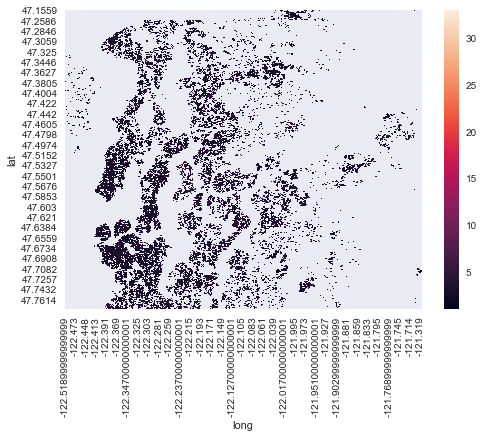

In [108]:
ax = sns.heatmap(df)